In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `c:\Users\admin\Documents\GitHub\GridGeneration`


In [2]:
using GridGeneration

In [3]:
using Plots

In [59]:
problems = [1,2,3];

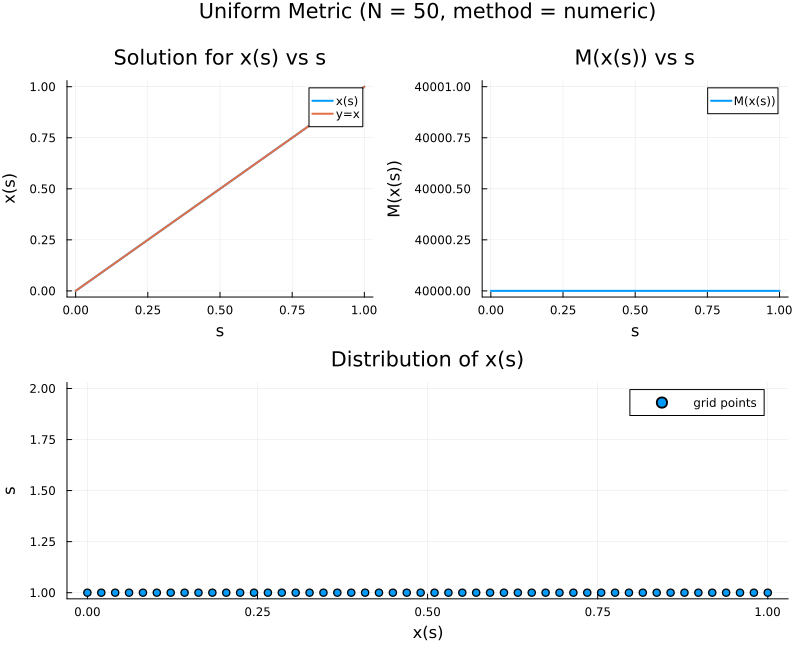

┌ Warning: Initial guess provided, but will be ignored for Shooting.
└ @ BoundaryValueDiffEqShooting C:\Users\admin\.julia\packages\BoundaryValueDiffEqShooting\tD3HT\src\single_shooting.jl:7
┌ Warning: Initial guess provided, but will be ignored for Shooting.
└ @ BoundaryValueDiffEqShooting C:\Users\admin\.julia\packages\BoundaryValueDiffEqShooting\tD3HT\src\single_shooting.jl:7
┌ Warning: Initial guess provided, but will be ignored for Shooting.
└ @ BoundaryValueDiffEqShooting C:\Users\admin\.julia\packages\BoundaryValueDiffEqShooting\tD3HT\src\single_shooting.jl:7


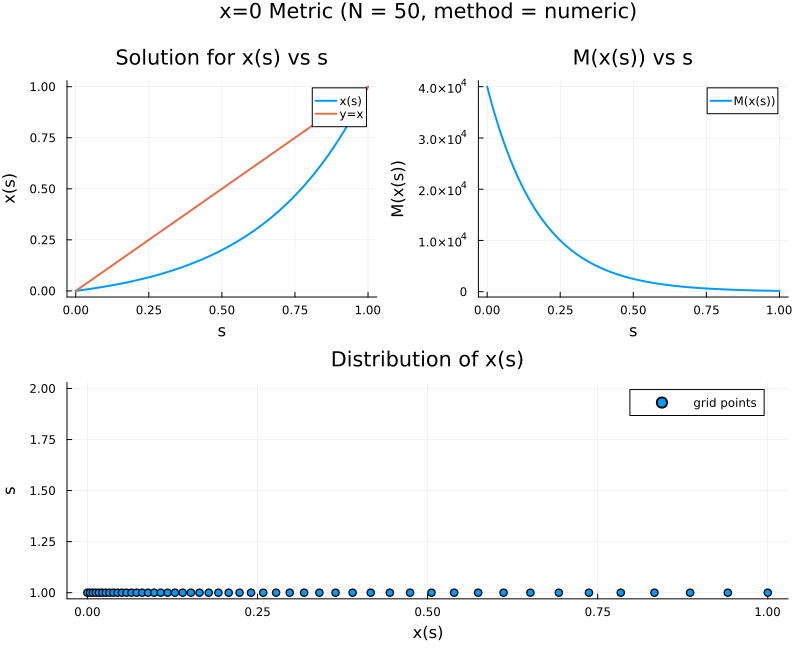

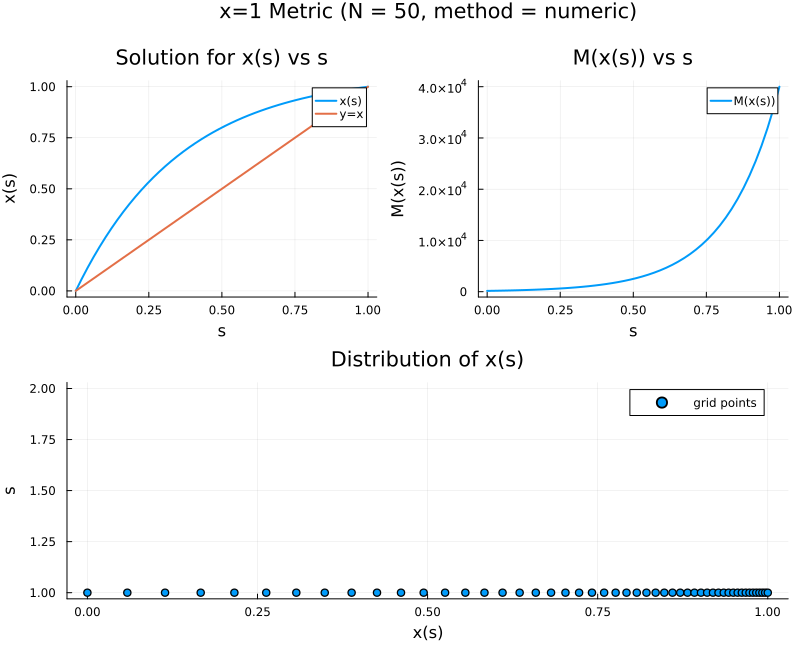

In [58]:
for problem in problems
# problem = 3 # 1: uniform, 2: clustering at x=0, 3: clustering at x=1, 4: clustering at x=0.5
method = "numeric"

N = 50
x0 = 0.0
x1 = 1.0

scale = 40000

if problem == 1
    name = "Uniform"
    M(x) = scale 
    M_u1(x) = 0
elseif problem == 2
    name = "x=0"
    M(x) = scale * (1 + 15 * (x))^(-2)
    M_u1(x) = -2 * scale * (1 + 15 * (x))^(-3) * (15)
elseif problem == 3
    name = "x=1"
    M(x) = scale * (1 + 15 * (1-x))^(-2)
    M_u1(x) = -2 * scale * (1 + 15 * (1-x))^(-3) * (-15)
end

sol = GridGeneration.SolveODE(M, M_u1, N, x0, x1);

folder = "ODENumericalMethods"
path = "../docs/src/assets/images/$folder/"

imageName = "$(name)_N$(N)_$(method).svg"
imagePath = "$(path)$(imageName)"

x_solution = sol[1, :]
M_solution = M.(x_solution)

# plot the solution
p1 = plot(range(0, 1, length=N), x_solution, label="x(s)", xlabel="s", ylabel="x(s)", title="Solution for x(s) vs s", linewidth=2)
plot!(p1, range(0, 1, length=N), range(0, 1, length=N), label="y=x", xlabel="s", ylabel="x(s)", title="Solution for x(s) vs s", linewidth=2)

p2 = plot(range(0, 1, length=N), M_solution, label="M(x(s))", xlabel="s", ylabel="M(x(s))", title="M(x(s)) vs s", linewidth=2)

p3 = scatter(x_solution, ones(length(x_solution)), label="grid points", xlabel="x(s)", ylabel="s", title="Distribution of x(s)", linewidth=2)

titlepanel = plot(title = "$name Metric (N = $N, method = $method)",
                  framestyle = :none, grid = false, ticks = nothing)

                  
p4 = plot(titlepanel, p1, p2, p3,
          layout = @layout([A{0.001h}; B C; D]),
          size = (800, 650), legend = :topright)

display(p4)
savefig(p4, imagePath)
end